# Problem Discription


For a given dataset of people with gender, age and genre of music that they prefer to listen to, You have to train a ML model, so that for a new person with a specific age and gender, your model will be able to predict what genre of music he/she will most likely prefer.

In [5]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing the dataset music
df = pd.read_csv("music.csv")
df.head(10)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [7]:
# Checking the size of the dataset
df.shape


(18, 3)

Observation - The dataset has 18 rows and 3 columns


In [8]:
# preprocessing the Dataset by dealing with the missing values in the Dataset
df.isnull().sum()
    

age       0
gender    0
genre     0
dtype: int64

Observation - There are no null values in the dataset.So we wont process the nu8ll value removal 


In [9]:
# preprocessing the Dataset by dealing with the datypes in the Dataset
df.dtypes

age        int64
gender     int64
genre     object
dtype: object

Observation -The genre column is the object datatype 

In [10]:
# checking complete info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [11]:
# Performing EDA 
#The columns Genre is Nominal Categorical data we will perform OneHotEncoding for the proper prediction.

GenreData = df[["genre"]]

GenreData = pd.get_dummies(GenreData, drop_first = True)

GenreData.head()



,genre_Classical,genre_Dance,genre_HipHop,genre_Jazz
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [12]:
# Adding the genre data in the dataset
finaldf = pd.concat([df, GenreData], axis = 1)

In [13]:
finaldf.head()

,age,gender,genre,genre_Classical,genre_Dance,genre_HipHop,genre_Jazz
0,20,1,HipHop,0,0,1,0
1,23,1,HipHop,0,0,1,0
2,25,1,HipHop,0,0,1,0
3,26,1,Jazz,0,0,0,1
4,29,1,Jazz,0,0,0,1


In [ ]:
# Droping the genre column in the dataset
finaldf.drop(["genre"], axis = 1, inplace = True)

In [ ]:
finaldf.head(5)

In [ ]:
finaldf.columns

In [ ]:
# Finding out independent variable and assighning to y variable
X = finaldf.loc[:,['age', 'genre_Classical', 'genre_Dance', 'genre_HipHop',
       'genre_Jazz']]
X.head()




In [ ]:
# Finding out dependent variable and assighning to y variable
y = finaldf.iloc[:, 1]
y.head()

In [ ]:
# Finding correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(finaldf.corr(),annot = True, cmap = "summer")

plt.show()

# Logistic Regression

In [ ]:
# Applying Linear Regression approach
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        X, y, test_size = 0.75, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 2)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

In [ ]:
# Let’s test the performance of our model – Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)


Observation - 
True Positive + True Negative = 7+ 0
False Positive + False Negative = 3 + 4

In [ ]:
#Performance measure – Accuracy 
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

# Decession Tree Approach

[1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0]
15
20
Gini : 0.0
Accuracy is:  0.7666666666666667


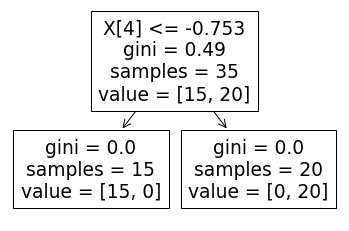

In [16]:
#%%
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
 
X, t = make_classification(100, 5, n_classes = 2, shuffle = True, random_state= 10)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.65, shuffle = True, random_state=1)
#%%
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, t_train)
#%%
predicted_value = model.predict(X_test)
print(predicted_value)
#%%
tree.plot_tree(model)
#%%
zeroes = 0
ones = 0
for i in range(0,len(t_train)):
    if t_train[i] == 0:
        zeroes +=1
    else:
        ones +=1
#%%      
print(zeroes)
print(ones)
#%%
val = 1 - ((zeroes/70)*2 + (ones/70)*2)
print("Gini :",val)
 
match = 0
UnMatch = 0
 
for i in range(30):
    if predicted_value[i] == t_test[i]:
        match += 1
    else:
        UnMatch += 1
         
accuracy = match/30
print("Accuracy is: ",accuracy)

# KNN Algorithm

In [ ]:
#elbow method 
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel = ('Number of clusters')

In [ ]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters = 3, init ='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

In [ ]:
# It predicts the cluster number to which datapoints belong to 
test = kmeans.predict(np.asarray([[20,0,0,1,0]]))
test[0]

# Naive Bayes Classifiers

In [15]:
X = finaldf.loc[:,['age', 'genre_Classical', 'genre_Dance', 'genre_HipHop',
       'genre_Jazz']]

y = finaldf.iloc[:, 1]
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 75.0


Observation - We have used different algorith to get the best result as shown in the abouve 